### Прогнозування тенденцій автомобільного ринку за допомогою методів машинного навчання

In [1]:
import pandas as pd
import numpy as np

Norway_automotive_market = pd.read_csv(
    "../input/newcarsalesnorway/norway_new_car_sales_by_month.csv"
)
print("Rows: {} and Columns: {}".format(*Norway_automotive_market.shape))
print("Number of Nan {}".format(Norway_automotive_market.isna().sum().sum()))
Norway_automotive_market.fillna(0, inplace=True)


Rows: 121 and Columns: 17
Number of Nan 296


In [2]:
Norway_automotive_market

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,0.0,0.0,152,155,152,10072,79.4,52.5,0.0,0.0,0.0
1,2007,2,9793,2448,1992,-89,0.0,0.0,156,159,155,7222,73.7,47.4,0.0,0.0,0.0
2,2007,3,11264,1445,2626,45,0.0,0.0,159,161,158,7965,70.7,48.1,0.0,0.0,0.0
3,2007,4,8854,504,2220,-130,0.0,0.0,160,165,158,6116,69.1,48.4,0.0,0.0,0.0
4,2007,5,12007,1592,2881,7,0.0,0.0,160,163,159,8519,71.0,49.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [3]:
Norway_automotive_market["Year"] = Norway_automotive_market["Year"].astype(str)
Norway_automotive_market["Month"] = Norway_automotive_market["Month"].astype(str)

Norway_automotive_market["Date"] = Norway_automotive_market["Year"].str.cat(
    Norway_automotive_market["Month"].str.zfill(2), sep="-"
)
Norway_automotive_market["Year"] = Norway_automotive_market["Year"].astype(int)
Norway_automotive_market["Month"] = Norway_automotive_market["Month"].astype(int)
Norway_automotive_market["Quantity_Diesel"] = Norway_automotive_market["Quantity_Diesel"].astype(int)

Norway_automotive_market.Date[:5]

0    2007-01
1    2007-02
2    2007-03
3    2007-04
4    2007-05
Name: Date, dtype: object

In [4]:
Norway_automotive_market

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,Date
0,2007,1,12685,5227,2276,257,0.0,0.0,152,155,152,10072,79.4,52.5,0.0,0.0,0.0,2007-01
1,2007,2,9793,2448,1992,-89,0.0,0.0,156,159,155,7222,73.7,47.4,0.0,0.0,0.0,2007-02
2,2007,3,11264,1445,2626,45,0.0,0.0,159,161,158,7965,70.7,48.1,0.0,0.0,0.0,2007-03
3,2007,4,8854,504,2220,-130,0.0,0.0,160,165,158,6116,69.1,48.4,0.0,0.0,0.0,2007-04
4,2007,5,12007,1592,2881,7,0.0,0.0,160,163,159,8519,71.0,49.1,0.0,0.0,0.0,2007-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0,2016-09
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0,2016-10
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0,2016-11
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0,2016-12


In [5]:
import plotly.express as px

fig = px.bar(
    Norway_automotive_market,
    x="Date",
    y="Quantity_Diesel",
    hover_data=["Year", "Month", "Quantity_Diesel"],
    color="Quantity_Diesel",
    text="Quantity_Diesel",
    height=600,
    width=2400,
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.show()

### Асоціативний масив

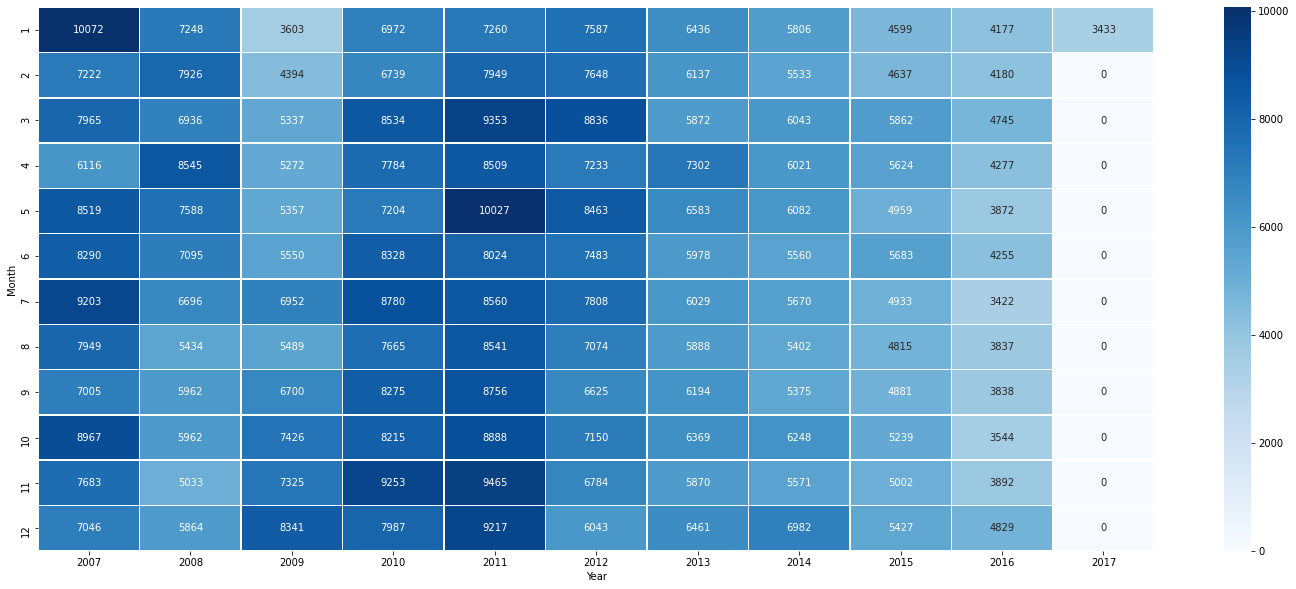

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

aux_csm = Norway_automotive_market[["Month", "Year", "Quantity_Diesel"]]
plt.figure(figsize=(25, 10))
sns.heatmap(
    aux_csm.pivot("Month", "Year", "Quantity_Diesel").fillna(0).astype(int),
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
)

In [7]:
import plotly.graph_objects as go


def plot_var_comp(data, column, title, xlabel, ylabel):
    data["d" + column] = data[column].diff()
    data["d2" + column] = data["d" + column].diff()

    # Create traces
    x = data.Date
    y = data[column]  # y
    dy = data["d" + column]  # dy'
    d2y = data["d2" + column]  # dy''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines", name=column))
    fig.add_trace(go.Scatter(x=x, y=dy, mode="lines", name=f"Increase of {column}"))
    fig.add_trace(go.Scatter(x=x, y=d2y, mode="lines", name="Increase's Acceleration"))
    fig.update_layout(
        title=title, xaxis_title=xlabel, yaxis_title=ylabel,
    )
    fig.show()

plot_var_comp(
    Norway_automotive_market,
    "Quantity_Diesel",
    "Sales and your components",
    "Date",
    "Number of sales",
)

### Автокореляція

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:409: UserWarning:

Requested projection is different from current axis projection, creating new axis with requested projection.



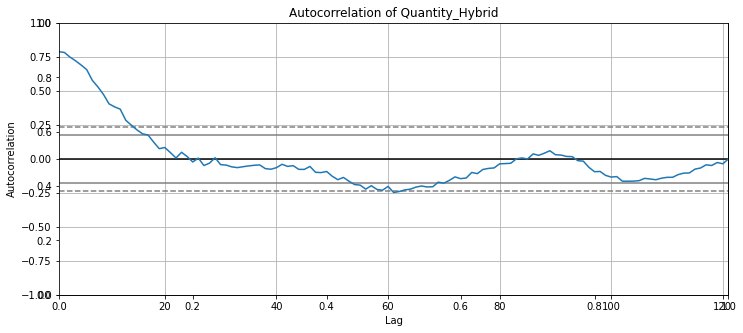

In [8]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 5))
plt.title("Autocorrelation of Quantity_Hybrid")
ax = autocorrelation_plot(Norway_automotive_market["Quantity_Diesel"])

### Boxplot за рік

In [9]:
fig = px.box(
    Norway_automotive_market,
    y="Quantity_Diesel",
    facet_col="Year",
    color="Year",
    boxmode="overlay",
    points="all",
)

fig.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(Norway_automotive_market.Quantity_Diesel, period=12)
data = {
    "observed": res.observed,
    "trend": res.trend,
    "seasonal": res.seasonal,
    "resid": res.resid,
}
res = pd.DataFrame(data)
res.head()

,observed,trend,seasonal,resid
0,10072.0,NaN,-693.352739,NaN
1,7222.0,NaN,-485.885147,NaN
2,7965.0,NaN,256.147261,NaN
3,6116.0,NaN,190.249113,NaN
4,8519.0,NaN,184.906520,NaN


In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Defining variables
fig = make_subplots(shared_xaxes=True,rows=4, cols=1)
x = Norway_automotive_market.Date
y = res.observed
z =res.trend
k =res.seasonal
w =res.resid

# Ploting the lines
fig.append_trace(go.Scatter(
    x=x,
    y=y,
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=z,
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=k
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=x,
    y=w
), row=4, col=1)

# Update properties and descriptions
fig.update_layout(height=700, width=1400, title_text="Statsmodel")
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Resid/Noise", row=4, col=1)
fig.show()


### Просте ковзаюче середнє
- n=10

In [12]:
Norway_automotive_market["sma_Quantity_Diesel"] = Norway_automotive_market.Quantity_Diesel.rolling(10).mean()
plot_var_comp(
    Norway_automotive_market,
    "sma_Quantity_Diesel",
    "Sales and your components with SMA",
    "Date",
    "SMA to Number of sales",
)

## Прогнозування

In [32]:
from fbprophet import Prophet
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def format_to_prophet(serie_ds, serie_y):
    aux = pd.DataFrame()
    aux["ds"] = serie_ds
    aux["y"] = serie_y
    return aux


X = Norway_automotive_market.Date
Y = Norway_automotive_market.Quantity 
prophet_data = format_to_prophet(X, Y)


def train_and_plot(cps, prophet_data, plot=False):
    model = Prophet(yearly_seasonality=True, changepoint_prior_scale=cps)
    model.fit(prophet_data)

    future = model.make_future_dataframe(periods=12, freq="M")
    forecast = model.predict(future)

    r2 = round(r2_score(prophet_data["y"], forecast["yhat"][:-12]), 3)
    mse = round(mean_squared_error(prophet_data["y"], forecast["yhat"][:-12]), 3)
    mae = round(mean_absolute_error(prophet_data["y"], forecast["yhat"][:-12]), 3)

    if plot:
        fig = go.Figure()
        fig.add_trace(
            go.Scatter(
                x=forecast["ds"],
                y=forecast["yhat"],
                mode="lines",
                name="Predict Values",
            )
        )
        fig.add_trace(
            go.Scatter(
                x=forecast["ds"], y=forecast["trend"], mode="lines", name="Trend"
            )
        )
        fig.add_trace(
            go.Scatter(
                x=prophet_data["ds"],
                y=prophet_data["y"],
                mode="lines",
                name="Real Values",
            )
        )
        fig.update_layout(
            title_text=f"Comperating the real x predicted for car sales",
            yaxis_title=f"Sales",
            xaxis_title="Date",
        )

        fig.show()
        print("R2: ", r2)
        print("MSE: ", mse)
        print("MAE: ", mae)
    else:
        return {"CPS": cps, "R2": r2, "MSE": mse, "MAE": mae}

In [33]:
from joblib import Parallel, delayed

cps_options = [round(x, 1) for x in np.linspace(start=0.1, stop=10, num=100)]

results = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_and_plot)(i, prophet_data) for i in cps_options
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [30]:
results = pd.DataFrame(results)
results = results[results.R2.isin([max(results.R2)])]
results = results[results.MSE.isin([min(results.MSE)])]
results

,CPS,R2,MSE,MAE
99,10.0,0.941,45915.269,139.936


In [31]:
train_and_plot(results.CPS.iloc[0], prophet_data, True)

R2:  0.941
MSE:  45915.269
MAE:  139.936
